<a href="https://colab.research.google.com/github/Gops03/PROSESAMIENTO_DIGITAL_DE_SE-ALES/blob/Cuadernos/2_2_Enventanado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files
uploaded = files.upload()  # Te deja subir el archivo .whl directamente

# Luego, instala el archivo que subiste
!pip install dsp_utils-0.2-py3-none-any.whl


Saving dsp_utils-0.2-py3-none-any.whl to dsp_utils-0.2-py3-none-any (1).whl
Processing ./dsp_utils-0.2-py3-none-any.whl
dsp-utils is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [13]:
import dsp_utils
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import spectrogram

from dsp_utils.signals.generator import SignalGenerator
from dsp_utils.signals.visualizations import Visualizer

import numpy as np


# Sección nueva

In [14]:
vis = Visualizer(figsize=(16, 7), dpi=100)

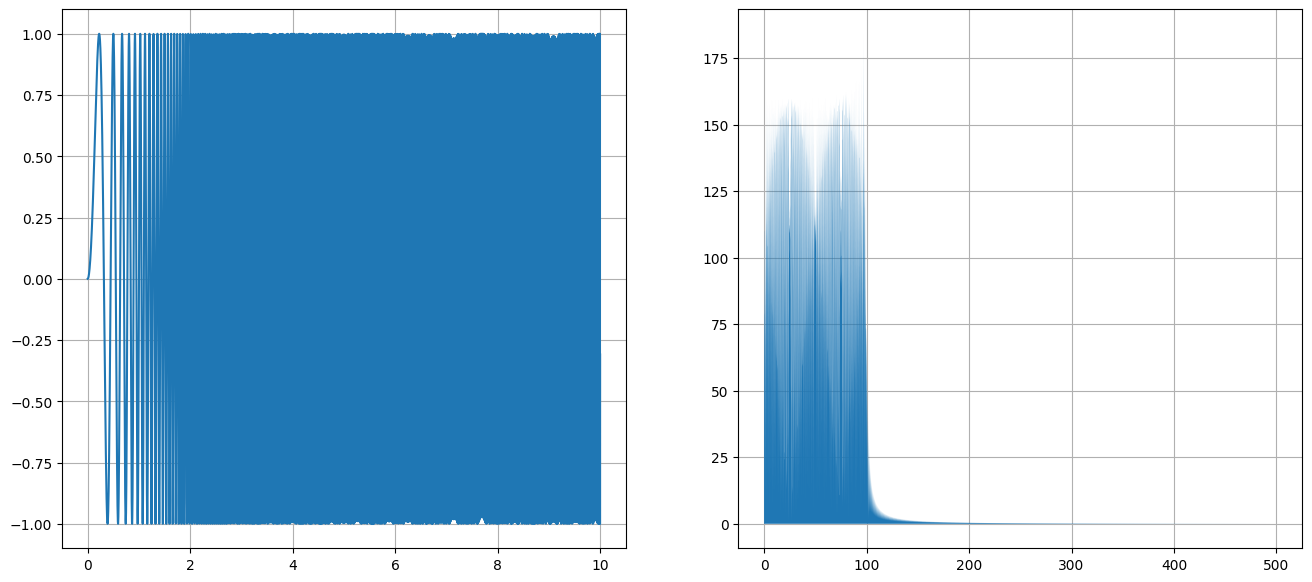

In [15]:
generador = SignalGenerator(frequency=[[0, 50]], amplitude=1, duration=10, sampling_rate=1000)
senal_seno = generador.sine_wave
vis.plot_dsp(senal_seno[0], sample_rate=1000, time=generador.time)

In [16]:
N = senal_seno.size
t = generador.time
f = generador.frequency[0]
s = senal_seno[0]
sp = None

@interact(start=(0, t[-1], 0.01), width=(0, t[-1]/2, 0.01))
def windowed_fourier(start=0, width=0.5):
    global sp

    plt.figure(figsize=(26, 10), dpi=90)

    window = [start, start+width]

    plt.subplot(321)
    plt.plot(t, s, color='C0', zorder=5)
    plt.fill_between(window, [s.min(), s.min()], [s.max(), s.max()], color='C1', alpha=0.5, zorder=10)


    plt.grid(True, zorder=0)
    plt.title('Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.subplot(322)

    sw = s[np.where((window[0] < t) & (t < window[1]))]
    tw = t[np.where((window[0] < t) & (t < window[1]))]

    S = np.abs(rfft(sw))
    W = rfftfreq(len(sw), t[1] - t[0])

    plt.vlines(W, 0, S)

    plt.xlim(0, f[-1]*2)

    plt.grid(True, zorder=0)
    plt.title('DSP')
    plt.xlabel('Frequency [Hz]')


    sp = np.zeros((len(W), int(len(t)/len(t[t<width]))))


    index = int(sp.shape[1]/(t[-1]/(start+0.1)))
    print(sp.shape, index)

    sp[:,index] = np.log10(S)

    ax = plt.subplot(312)

    plt.matshow(sp[0:100], aspect='auto', fignum=False)

    ax = plt.subplot(313)

    f_, t_, Sxx = spectrogram(s, fs=1/t[1], noverlap=0, nperseg=sp.shape[0])
    plt.pcolormesh(t_, f_, np.log10(Sxx))
    plt.ylim([0, 100])
    plt.gca().invert_yaxis()
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='start', max=9.999, step=0.01), FloatSlider(value=0.5…